In [1]:
import torchvision
import torchvision.transforms as transforms
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import init
import math
class VGG19(nn.Module):
    def __init__(self):
        super(VGG19, self).__init__()
        # conv layers
        self.conv1_1 = nn.Conv2d(3, 64, kernel_size = 3, padding = 1)
        self.conv1_2 = nn.Conv2d(64, 64, kernel_size = 3, padding = 1)
        
        self.conv2_1 = nn.Conv2d(64, 128, kernel_size = 3, padding = 1)
        self.conv2_2 = nn.Conv2d(128, 128, kernel_size = 3, padding = 1)
        
        self.conv3_1 = nn.Conv2d(128, 256, kernel_size = 3, padding = 1)
        self.conv3_2 = nn.Conv2d(256, 256, kernel_size = 3, padding = 1)
        self.conv3_3 = nn.Conv2d(256, 256, kernel_size = 3, padding = 1)
        self.conv3_4 = nn.Conv2d(256, 256, kernel_size = 3, padding = 1)
        
        self.conv4_1 = nn.Conv2d(256, 512, kernel_size = 3, padding = 1)
        self.conv4_2 = nn.Conv2d(512, 512, kernel_size = 3, padding = 1)
        self.conv4_3 = nn.Conv2d(512, 512, kernel_size = 3, padding = 1)
        self.conv4_4 = nn.Conv2d(512, 512, kernel_size = 3, padding = 1)
        
        self.conv5_1 = nn.Conv2d(512, 512, kernel_size = 3, padding = 1)
        self.conv5_2 = nn.Conv2d(512, 512, kernel_size = 3, padding = 1)
        self.conv5_3 = nn.Conv2d(512, 512, kernel_size = 3, padding = 1)
        self.conv5_4 = nn.Conv2d(512, 512, kernel_size = 3, padding = 1)
        
        # max pooling
        self.pool = nn.MaxPool2d(2, 2)
        # fully connected layers:
        self.fc6 = nn.Linear(512, 4096)
        self.fc7 = nn.Linear(4096, 4096)
        self.fc8 = nn.Linear(4096, 10)
        
        self.bn64 = nn.BatchNorm2d(64, momentum = 0.9)
        self.bn128 = nn.BatchNorm2d(128, momentum = 0.9)
        self.bn256 = nn.BatchNorm2d(256, momentum = 0.9)
        self.bn512 = nn.BatchNorm2d(512, momentum = 0.9)
        
        self._initialize_weights_()

    def _initialize_weights_(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                init.xavier_normal_(m.weight, gain=1)
            elif isinstance(m, nn.BatchNorm2d):
                m.weight.data.fill_(1)
                m.bias.data.zero_()
            elif isinstance(m, nn.Conv2d):
                init.xavier_normal_(m.weight, gain=1)
        
    def forward(self, x, training = True):
        x = self.conv1_1(x)
        x = F.relu(self.bn64(x))
        x = self.conv1_2(x)
        x = F.relu(self.bn64(x))
        x = self.pool(x)
        
        x = self.conv2_1(x)
        x = F.relu(self.bn128(x))
        x = self.conv2_2(x)
        x = F.relu(self.bn128(x))
        x = self.pool(x)
        
        x = self.conv3_1(x)
        x = F.relu(self.bn256(x))
        x = self.conv3_2(x)
        x = F.relu(self.bn256(x))
        x = self.conv3_3(x)
        x = F.relu(self.bn256(x))
        x = self.conv3_4(x)
        x = F.relu(self.bn256(x))
        x = self.pool(x)
        
        x = self.conv4_1(x)
        x = F.relu(self.bn512(x))
        x = self.conv4_2(x)
        x = F.relu(self.bn512(x))
        x = self.conv4_3(x)
        x = F.relu(self.bn512(x))
        x = self.conv4_4(x)
        x = F.relu(self.bn512(x))
        x = self.pool(x)
        
        x = self.conv5_1(x)
        x = F.relu(self.bn512(x))
        x = self.conv5_2(x)
        x = F.relu(self.bn512(x))
        x = self.conv5_3(x)
        x = F.relu(self.bn512(x))
        x = self.conv5_4(x)
        x = F.relu(self.bn512(x))
        x = self.pool(x)
        
        x = x.view(-1, 512)
        
        x = F.relu(self.fc6(x))
        x = F.dropout(x, 0.5, training = training)
        x = F.relu(self.fc7(x))
        x = F.dropout(x, 0.5, training = training)
        x = self.fc8(x)
#         x = F.softmax(x, dim = 0)
        return x

In [2]:
vgg = VGG19()
vgg

VGG19(
  (conv1_1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv1_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4_1): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4_2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4_3): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4_4): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5_1): Conv2d(512, 51

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

vgg.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(vgg.parameters(), lr=1e-4, momentum=0.9)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
epoch_num = 50
losses = []
for epoch in range(epoch_num):
    running_loss = 0.0
    loss_epoch = 0
    for i, data in enumerate(trainloader, 0):       
        print(i, end='\r')
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = vgg(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        loss_epoch += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
    losses += [loss_epoch]
print('Finished Training')

[1,  2000] loss: 2.207
[1,  4000] loss: 1.884
[1,  6000] loss: 1.774
[1,  8000] loss: 1.683
[1, 10000] loss: 1.581
[1, 12000] loss: 1.517
[2,  2000] loss: 1.412
[2,  4000] loss: 1.365
[2,  6000] loss: 1.313
[2,  8000] loss: 1.242
[2, 10000] loss: 1.197
[2, 12000] loss: 1.169
[3,  2000] loss: 1.065
[3,  4000] loss: 1.040
[3,  6000] loss: 1.026
[3,  8000] loss: 1.020
[3, 10000] loss: 0.981
[3, 12000] loss: 0.953
[4,  2000] loss: 0.863
[4,  4000] loss: 0.868
[4,  6000] loss: 0.852
[4,  8000] loss: 0.811
[4, 10000] loss: 0.840
[4, 12000] loss: 0.795
[5,  2000] loss: 0.706
[5,  4000] loss: 0.717
[5,  6000] loss: 0.720
[5,  8000] loss: 0.701
[5, 10000] loss: 0.706
[5, 12000] loss: 0.702
[6,  2000] loss: 0.585
[6,  4000] loss: 0.588
[6,  6000] loss: 0.601
[6,  8000] loss: 0.610
[6, 10000] loss: 0.604
[6, 12000] loss: 0.595
[7,  2000] loss: 0.483
[7,  4000] loss: 0.513
[7,  6000] loss: 0.495
[7,  8000] loss: 0.502
[7, 10000] loss: 0.518
[7, 12000] loss: 0.513
[8,  2000] loss: 0.379
[8,  4000] 

In [5]:
PATH='vgg19.pth' # 模型名字
torch.save(vgg.state_dict(),PATH) # 保存，net为需要保存的网络


# pretrained_net = torch.load(PATH) # 读取
# vgg = VGG19() # Net()为保存的模型同结构的模型
# vgg.load_state_dict(pretrained_net) # 加载权重

In [6]:
import numpy as np
np.save("losses19.npy", np.array(losses)) 

In [7]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = vgg(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 79 %


In [8]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = vgg(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 89 %
Accuracy of   car : 89 %
Accuracy of  bird : 71 %
Accuracy of   cat : 66 %
Accuracy of  deer : 80 %
Accuracy of   dog : 55 %
Accuracy of  frog : 89 %
Accuracy of horse : 82 %
Accuracy of  ship : 88 %
Accuracy of truck : 83 %


In [12]:
vgg.state_dict()

OrderedDict([('conv1_1.weight',
              tensor([[[[ 0.2135,  0.1199, -0.2601],
                        [ 0.1319, -0.0767, -0.1929],
                        [ 0.1061,  0.0914,  0.0641]],
              
                       [[ 0.1424,  0.0657, -0.1995],
                        [-0.0998, -0.0350, -0.1925],
                        [-0.0131,  0.0216, -0.1169]],
              
                       [[ 0.1193,  0.1094,  0.0102],
                        [ 0.0363, -0.0519, -0.1553],
                        [ 0.0049,  0.0970,  0.0498]]],
              
              
                      [[[ 0.1330,  0.2651,  0.0605],
                        [ 0.1034, -0.0337, -0.0663],
                        [ 0.1464, -0.2354, -0.0907]],
              
                       [[-0.1633,  0.0842,  0.0423],
                        [-0.0424, -0.2108,  0.0112],
                        [ 0.1085, -0.1256,  0.0470]],
              
                       [[-0.0673,  0.0405, -0.1427],
                        

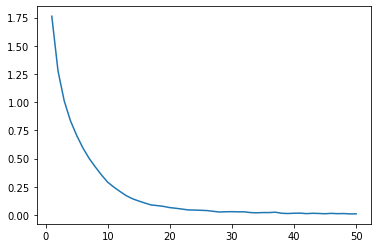

In [13]:
import matplotlib.pyplot as plt
nploss = np.array(losses)
plt.plot(range(1, 51), nploss/12500)